In [1]:
!pip install pandas
!pip install sklearn
!pip install itertools
!pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from itertools import combinations
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_csv("NN_diaryl_indigo.csv")
df

,ln(kobs),Ar1_NBO_C2,Ar1_NBO_=O,Ar1_NBO_-O,Ar1_v_C=O,Ar1_I_C=O,Ar1_Ster_L,Ar1_Ster_B1,Ar1_Ster_B5,Ar1_dp,...,Ar2_NBO_-O,Ar2_v_C=O,Ar2_I_C=O,Ar2_Ster_L,Ar2_Ster_B1,Ar2_Ster_B5,Ar2_dp,Ar2_polar,Ar2_LUMO,Ar2_HOMO
0,-0.339256,-0.216,-0.611,-0.705,1839.28,444.9562,8.54,1.83,3.23,3.638326,...,-0.705,1839.28,444.9562,8.54,1.83,3.23,3.638326,108.240333,-0.01555,-0.29463
1,-1.502379,-0.181,-0.603,-0.701,1848.02,391.1199,6.39,1.70,3.22,2.075965,...,-0.701,1848.02,391.1199,6.39,1.70,3.22,2.075965,87.513000,-0.02742,-0.32424
2,-2.428148,-0.200,-0.603,-0.702,1847.96,399.4850,6.99,1.70,3.22,1.401426,...,-0.702,1847.96,399.4850,6.99,1.70,3.22,1.401426,87.804000,-0.02792,-0.32452
3,-4.755993,-0.159,-0.593,-0.698,1854.75,375.6943,7.75,2.17,3.22,2.001325,...,-0.698,1854.75,375.6943,7.75,2.17,3.22,2.001325,101.249000,-0.04827,-0.34295
4,-5.599422,-0.153,-0.598,-0.697,1855.51,393.2485,8.22,1.70,3.22,3.576998,...,-0.697,1855.51,393.2485,8.22,1.70,3.22,3.576998,106.042333,-0.06346,-0.34281
5,-6.377127,-0.148,-0.588,-0.696,1857.25,370.5649,7.72,1.70,3.23,3.630021,...,-0.696,1857.25,370.5649,7.72,1.70,3.23,3.630021,105.602667,-0.08032,-0.35252
6,-2.893176,-0.159,-0.593,-0.698,1854.75,375.6943,7.75,2.17,3.22,2.001325,...,-0.705,1839.28,444.9562,8.54,1.83,3.23,3.638326,108.240333,-0.01555,-0.29463
7,-3.304979,-0.159,-0.593,-0.698,1854.75,375.6943,7.75,2.17,3.22,2.001325,...,-0.702,1847.96,399.4850,6.99,1.70,3.22,1.401426,87.804000,-0.02792,-0.32452
8,-2.112792,-0.156,-0.601,-0.704,1848.11,387.6622,7.24,1.82,4.69,2.558163,...,-0.704,1848.11,387.6622,7.24,1.82,4.69,2.558163,106.115667,-0.02669,-0.29193
9,-3.568433,-0.176,-0.598,-0.694,1851.56,357.6061,6.92,1.70,4.37,2.317463,...,-0.694,1851.56,357.6061,6.92,1.70,4.37,2.317463,103.719667,-0.05033,-0.33791


In [3]:
parm = ['Ar1_NBO_C2', 'Ar1_NBO_=O', 'Ar1_NBO_-O', 'Ar1_v_C=O', 'Ar1_I_C=O', 'Ar1_Ster_L', 'Ar1_Ster_B1', 'Ar1_Ster_B5', 'Ar1_dp', 'Ar1_polar', 'Ar1_LUMO', 'Ar1_HOMO', 'Ar2_NBO_C2', 'Ar2_NBO_=O', 'Ar2_NBO_-O', 'Ar2_v_C=O', 'Ar2_I_C=O', 'Ar2_Ster_L', 'Ar2_Ster_B1', 'Ar2_Ster_B5', 'Ar2_dp', 'Ar2_polar', 'Ar2_LUMO', 'Ar2_HOMO']
df_x = df[parm]
scaler = StandardScaler()
df[parm] = scaler.fit_transform(df_x)
df

,ln(kobs),Ar1_NBO_C2,Ar1_NBO_=O,Ar1_NBO_-O,Ar1_v_C=O,Ar1_I_C=O,Ar1_Ster_L,Ar1_Ster_B1,Ar1_Ster_B5,Ar1_dp,...,Ar2_NBO_-O,Ar2_v_C=O,Ar2_I_C=O,Ar2_Ster_L,Ar2_Ster_B1,Ar2_Ster_B5,Ar2_dp,Ar2_polar,Ar2_LUMO,Ar2_HOMO
0,-0.339256,-2.445655,-2.343844,-1.933207,-2.636604,2.860724,1.835981,-0.088451,-0.766323,1.525347,...,-1.472421,-1.915054,2.064904,1.662558,0.335054,-0.767905,1.270761,0.966998,1.336701,1.595741
1,-1.502379,-0.565971,-1.011823,-0.736460,-0.845983,0.157256,-1.407740,-0.767917,-0.779227,-0.464593,...,-0.423573,-0.414858,-0.166914,-1.280349,-0.624677,-0.780819,-0.505367,-1.777780,0.742393,0.203487
2,-2.428148,-1.586371,-1.011823,-1.035646,-0.858275,0.577321,-0.502516,-0.767917,-0.779227,-1.323737,...,-0.685785,-0.425157,0.179866,-0.459073,-0.624677,-0.780819,-1.272198,-1.739245,0.717359,0.190321
3,-4.755993,0.615545,0.653202,0.161101,0.532837,-0.617363,0.644102,1.688614,-0.779227,-0.559660,...,0.363063,0.740327,-0.806393,0.581211,2.845122,-0.780819,-0.590219,0.041184,-0.301525,-0.676252
4,-5.599422,0.937776,-0.179310,0.460287,0.688543,0.264146,1.353195,-0.767917,-0.779227,1.447235,...,0.625275,0.870779,-0.078672,1.224544,-0.624677,-0.780819,1.201042,0.675932,-1.062058,-0.669669
5,-6.377127,1.206303,1.485715,0.759474,1.045028,-0.874944,0.598841,-0.767917,-0.766323,1.514769,...,0.887486,1.169445,-1.019035,0.540147,-0.624677,-0.767905,1.261320,0.617710,-1.906205,-1.126231
6,-2.893176,0.615545,0.653202,0.161101,0.532837,-0.617363,0.644102,1.688614,-0.779227,-0.559660,...,-1.472421,-1.915054,2.064904,1.662558,0.335054,-0.767905,1.270761,0.966998,1.336701,1.595741
7,-3.304979,0.615545,0.653202,0.161101,0.532837,-0.617363,0.644102,1.688614,-0.779227,-0.559660,...,-0.685785,-0.425157,0.179866,-0.459073,-0.624677,-0.780819,-1.272198,-1.739245,0.717359,0.190321
8,-2.112792,0.776661,-0.678818,-1.634020,-0.827544,-0.016378,-0.125339,-0.140718,1.117719,0.149570,...,-1.210209,-0.399410,-0.310256,-0.116874,0.261229,1.117585,0.042807,0.685643,0.778943,1.722694
9,-3.568433,-0.297444,-0.179310,1.357848,-0.120720,-1.525689,-0.608125,-0.767917,0.704779,-0.157003,...,1.411910,0.192773,-1.556250,-0.554888,-0.624677,0.704327,-0.230826,0.368357,-0.404665,-0.439273


In [4]:
for i in range (1, 3):
  for c in combinations(parm, i):
    x = df[list(c)]
    y = df['ln(kobs)']
    regr = linear_model.LinearRegression()
    regr.fit(x,y)
    y_pred = regr.predict(x)
    r2 = regr.score(x,y)
    if r2 > 0.92:
      print(list(c))
      print("rmse =", mean_squared_error(y, y_pred))
      print("r2 =", regr.score(x,y))
      print(regr.coef_)
      print(regr.intercept_)
      print("")

['Ar1_NBO_=O', 'Ar2_LUMO']
rmse = 0.24738094638198874
r2 = 0.9285404136958842
[-0.81037759  1.1700227 ]
-3.8256745911538474

['Ar1_v_C=O', 'Ar2_LUMO']
rmse = 0.18603733777917733
r2 = 0.9462604077264255
[-0.91638766  1.06176699]
-3.8256745911539056

['Ar1_LUMO', 'Ar2_NBO_=O']
rmse = 0.25883511534085685
r2 = 0.9252317103085415
[ 1.15066662 -0.77782417]
-3.825674591153845

['Ar1_LUMO', 'Ar2_v_C=O']
rmse = 0.23144976741213205
r2 = 0.9331423665753307
[ 1.14124174 -0.80182249]
-3.8256745911538386



In [5]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x_phenylall_r = df[['Ar1_v_C=O', 'Ar2_LUMO']]
y_phenylall_r = df[['ln(kobs)']]
x_phenylall_array = np.array(x_phenylall_r)
y_phenylall_array = np.array(y_phenylall_r)
loo = LeaveOneOut()
y_phenylall_testall = []
y_phenylall_predall = []
for train_i, test_i in loo.split(x_phenylall_r):
    x_phenylall_train, x_phenylall_test = x_phenylall_array[train_i], x_phenylall_array[test_i]
    y_phenylall_train, y_phenylall_test = y_phenylall_array[train_i], y_phenylall_array[test_i]
    
    model = LinearRegression()
    model.fit(X = x_phenylall_train, y = y_phenylall_train)
    y_phenylall_pred = model.predict(x_phenylall_test)
    
    y_phenylall_testall += list(y_phenylall_test)
    y_phenylall_predall += list(y_phenylall_pred)
    
rr = metrics.r2_score(y_phenylall_testall, y_phenylall_predall)
ms_error = metrics.mean_squared_error(y_phenylall_testall, y_phenylall_predall)

print("r2 =", rr, ",", "rmse =", ms_error)

r2 = 0.9072582693011566 , rmse = 0.3210561143153725


In [6]:
x1 = df[['Ar1_v_C=O', 'Ar2_LUMO']]
y1 = df['ln(kobs)']
regr = linear_model.LinearRegression()
regr.fit(x1,y1)
y_pred1 = regr.predict(x1)
r2 = regr.score(x1,y1)
print("rmse =", mean_squared_error(y1, y_pred1))
print("r2 =", regr.score(x1,y1))
print(regr.coef_)
print(regr.intercept_)

rmse = 0.18603733777917733
r2 = 0.9462604077264255
[-0.91638766  1.06176699]
-3.8256745911539056


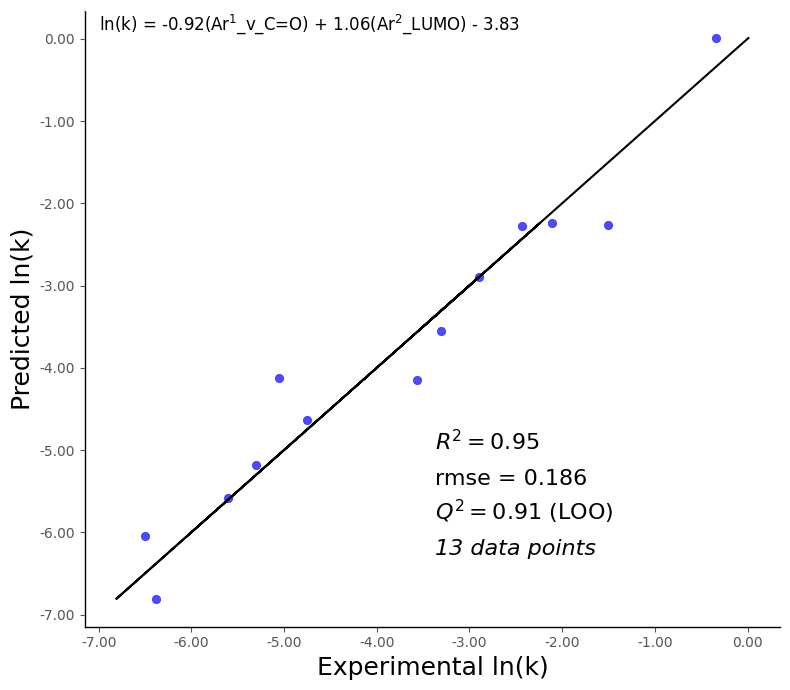

In [7]:
from matplotlib.ticker import FormatStrFormatter

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 7))

ax.set_facecolor('w')

ax.plot(y_pred1, y_pred1, color='k')
ax.scatter(y1, y_pred1, edgecolor='b', facecolor='b', alpha=0.7)
ax.set_ylabel('Predicted ln(k)', fontsize=18, color='k')
ax.set_xlabel('Experimental ln(k)', fontsize=18, color='k')
ax.spines['bottom'].set_color('k')
ax.spines['left'].set_color('k')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig.text(0.13, 0.95, 'ln(k) = -0.92(Ar$^1$_v_C=O) + 1.06(Ar$^2$_LUMO) - 3.83', fontsize = 12)
fig.text(0.55, 0.35, '$R^2= 0.95$', fontsize = 16)
fig.text(0.55, 0.30, 'rmse = 0.186', fontsize = 16)
fig.text(0.55, 0.25, '$Q^2= 0.91$ (LOO)', fontsize = 16)
fig.text(0.55, 0.20, '13 data points', fontsize = 16, style = 'italic')
fig.tight_layout()

plt.savefig('NN_diaryl_indigo.png', bbox_inches='tight')